In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [ ]:
folder_path = "/content/drive/MyDrive/UMD_AI_CASE_COMP/H1B_Visa_Data/"
dfs = {}  # Dictionary to store DataFrames

for year in range(2018, 2024):
    file_path = folder_path + f"PERM_FY{year}.xlsx"
    df = pd.read_excel(file_path)
    df['year'] = year  # Add year column
    dfs[year] = df  # Store DataFrame in dictionary

In [ ]:
merge_cols = ['CASE_STATUS', 'CLASS_OF_ADMISSION', 'COUNTRY_OF_CITIZENSHIP',
              'EMPLOYER_CITY', 'EMPLOYER_NAME', 'EMPLOYER_STATE', 'JOB_TITLE',
              'PW_WAGE', 'PW_UNIT_OF_PAY', 'PW_WAGE_SOURCE','PW_SOC_CODE', 'year']

for year, df in dfs.items():
    missing_cols = set(merge_cols) - set(df.columns)
    if missing_cols:
        print(f"DataFrame for year {year} is missing these columns: {missing_cols}")
    else:
        print(f"DataFrame for year {year} contains all merge columns.")

DataFrame for year 2018 is missing these columns: {'PW_WAGE_SOURCE', 'PW_WAGE', 'JOB_TITLE', 'PW_UNIT_OF_PAY'}
DataFrame for year 2019 is missing these columns: {'PW_WAGE_SOURCE', 'PW_WAGE', 'JOB_TITLE', 'PW_UNIT_OF_PAY'}
DataFrame for year 2020 is missing these columns: {'EMPLOYER_STATE'}
DataFrame for year 2021 is missing these columns: {'EMPLOYER_STATE'}
DataFrame for year 2022 is missing these columns: {'EMPLOYER_STATE'}
DataFrame for year 2023 is missing these columns: {'EMPLOYER_STATE'}


In [ ]:
for year in range(2020, 2024):
  dfs[year].rename(columns={'EMPLOYER_STATE_PROVINCE': 'EMPLOYER_STATE'}, inplace=True)

In [ ]:
for year in range(2018, 2020):
  dfs[year].rename(columns={'PW_UNIT_OF_PAY_9089': 'PW_UNIT_OF_PAY'}, inplace=True)
  dfs[year].rename(columns={'JOB_INFO_JOB_TITLE': 'JOB_TITLE'}, inplace=True)
  dfs[year].rename(columns={'PW_SOURCE_NAME_9089': 'PW_WAGE_SOURCE'}, inplace=True)
  dfs[year].rename(columns={'PW_AMOUNT_9089': 'PW_WAGE'}, inplace=True)

In [ ]:
dfs_tmp = dfs.copy()
# Select desired columns in each DataFrame
for year, df in dfs_tmp.items():
    dfs_tmp[year] = df[merge_cols]

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs_tmp.values(), ignore_index=True)

In [ ]:
combined_df.year.value_counts()

,count
year,
2018,119776
2023,116427
2021,108264
2022,104600
2019,102655
2020,94019


In [ ]:
combined_df.columns

Index(['CASE_STATUS', 'CLASS_OF_ADMISSION', 'COUNTRY_OF_CITIZENSHIP',
       'EMPLOYER_CITY', 'EMPLOYER_NAME', 'EMPLOYER_STATE', 'JOB_TITLE',
       'PW_WAGE', 'PW_UNIT_OF_PAY', 'PW_WAGE_SOURCE', 'PW_SOC_CODE', 'year'],
      dtype='object')

In [ ]:
# Keep only certified or denied visas
combined_df = combined_df[combined_df['CASE_STATUS'].isin(['Certified', 'Denied'])]

# Dropping anything not H-1B
combined_df = combined_df[combined_df['CLASS_OF_ADMISSION'] == 'H-1B']

# Dropping all empty columns
combined_df = combined_df.dropna(axis=1, how='all');

# Dropping all empty rows
combined_df = combined_df.dropna(axis=0, how='all');

In [ ]:
# Displaying number of missing values in each column
for column in combined_df.columns:
    print("Attribute '{}' contains ".format(column),  combined_df[column].isnull().sum().sum(), " missing values")

Attribute 'CASE_STATUS' contains  0  missing values
Attribute 'CLASS_OF_ADMISSION' contains  0  missing values
Attribute 'COUNTRY_OF_CITIZENSHIP' contains  4  missing values
Attribute 'EMPLOYER_CITY' contains  0  missing values
Attribute 'EMPLOYER_NAME' contains  0  missing values
Attribute 'EMPLOYER_STATE' contains  3  missing values
Attribute 'JOB_TITLE' contains  3  missing values
Attribute 'PW_WAGE' contains  291  missing values
Attribute 'PW_UNIT_OF_PAY' contains  292  missing values
Attribute 'PW_WAGE_SOURCE' contains  290  missing values
Attribute 'PW_SOC_CODE' contains  297  missing values
Attribute 'year' contains  0  missing values


In [ ]:
# Displaying 15 most popular cities
combined_df['EMPLOYER_CITY'] = combined_df['EMPLOYER_CITY'].str.upper()
combined_df['EMPLOYER_CITY'].value_counts().head(15)

,count
EMPLOYER_CITY,
NEW YORK,16947
SEATTLE,14582
SAN FRANCISCO,9257
MOUNTAIN VIEW,8952
SANTA CLARA,7099
CHICAGO,6837
SAN JOSE,6112
REDMOND,5638
MENLO PARK,4077


[Text(0.5, 0, 'Employer city'), Text(0, 0.5, 'Number of Visa applications')]

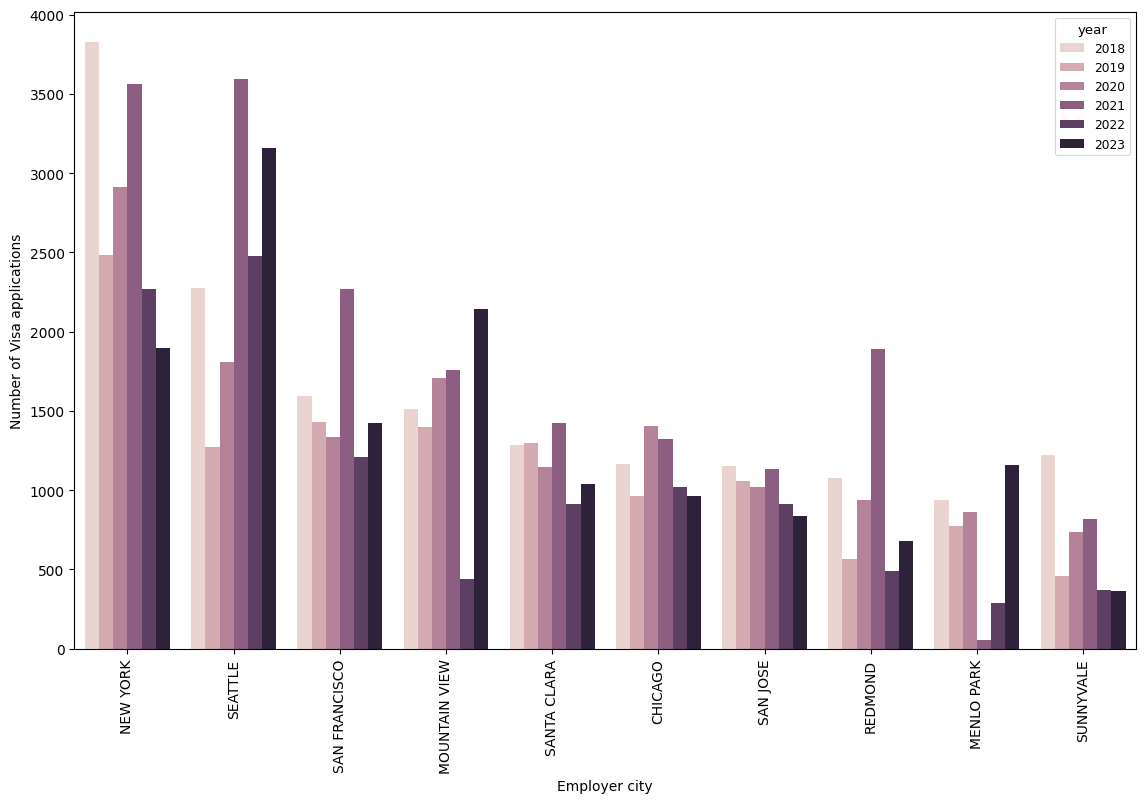

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 8.27)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.countplot(x='EMPLOYER_CITY', hue='year', data=combined_df, order=combined_df.EMPLOYER_CITY.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
ax.set(xlabel='Employer city', ylabel='Number of Visa applications')

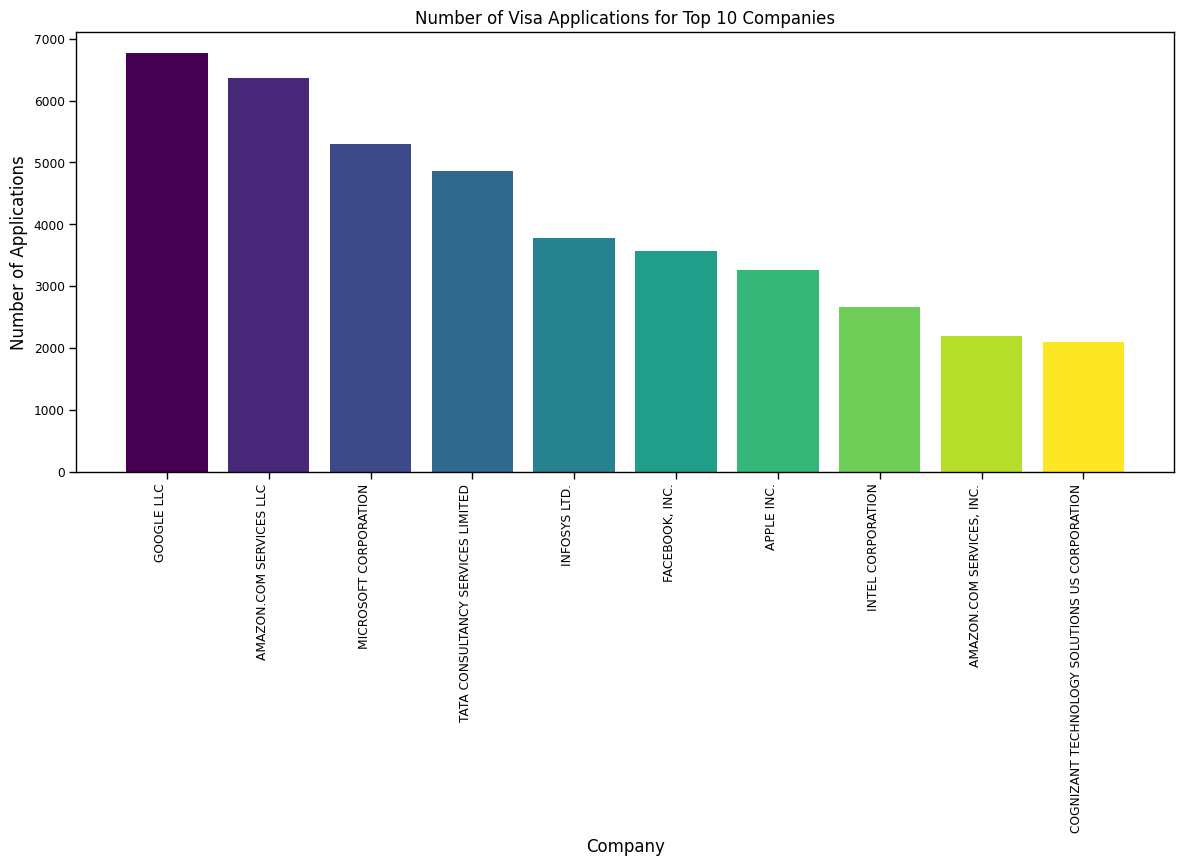

In [ ]:
import numpy as np
# Group by company, count applications, and get top 10
top_10_companies = combined_df.groupby('EMPLOYER_NAME')['EMPLOYER_CITY'].count().nlargest(10)

# Create bar graph with colors and better fit
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_companies))) # Generate colors from viridis colormap
bars = plt.bar(top_10_companies.index, top_10_companies.values, color=colors) # Create bar plot with colors

plt.title('Number of Visa Applications for Top 10 Companies')
plt.xlabel('Company')
plt.ylabel('Number of Applications')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels and align to the right
plt.tight_layout()

# Adjust spacing between bars
plt.subplots_adjust(bottom=0.2)  # Increase bottom margin for x-axis labels

plt.show()

In [ ]:
combined_df['JOB_TITLE'].value_counts()[:20]

,count
JOB_TITLE,
Software Engineer,22310
Software Development Engineer II,6424
Software Developer,5734
Senior Software Engineer,4911
Assistant Professor,2497
Technical Lead,1768
Software Development Engineer,1689
SOFTWARE DEVELOPER,1657
Developer,1621


In [ ]:
#Converting values to lower case
combined_df['JOB_TITLE'] = combined_df['JOB_TITLE'].str.lower()

#Splitting job titles by '-'
combined_df['JOB_TITLE'] = combined_df['JOB_TITLE'].astype(str).str.split('-').str[0]
#Splitting job titles by 'ii'
combined_df['JOB_TITLE'] = combined_df['JOB_TITLE'].astype(str).str.split('ii').str[0]
#Splitting job titles by '/'
combined_df['JOB_TITLE'] = combined_df['JOB_TITLE'].astype(str).str.split('/').str[0]
#Removing leading and ending spaces
combined_df['JOB_TITLE'] = combined_df['JOB_TITLE'].astype(str).str.strip()
#Replacing "sr." values with "senior"
combined_df['JOB_TITLE'] = combined_df['JOB_TITLE'].str.replace('sr.', 'senior')
#Replacing "NaN", "NaT" and "nan" values with np.nan
combined_df['JOB_TITLE'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)


combined_df['JOB_TITLE'].value_counts(dropna=True)[:10]

<ipython-input-15-e4bdc2cf1793>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['JOB_TITLE'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)


,count
JOB_TITLE,
software engineer,25529
software developer,9528
software development engineer,8893
senior software engineer,6926
assistant professor,2775
programmer analyst,2110
systems analyst,1983
senior software developer,1953
technical lead,1826


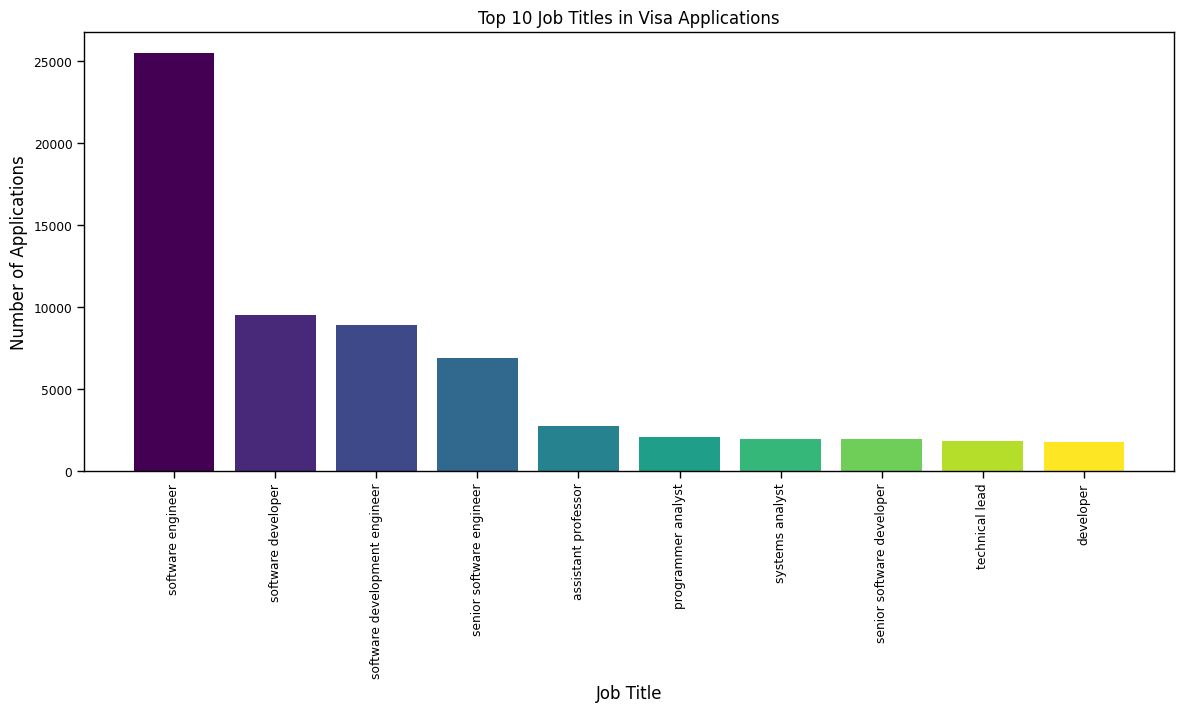

In [ ]:
# Group by JOB_TITLE, count occurrences, and get top 10
top_10_job_titles = combined_df.groupby('JOB_TITLE')['EMPLOYER_CITY'].count().nlargest(10)

# Create bar graph with colors and centering
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_job_titles)))
bars = plt.bar(top_10_job_titles.index, top_10_job_titles.values, color=colors)

plt.title('Top 10 Job Titles in Visa Applications')
plt.xlabel('Job Title')
plt.ylabel('Number of Applications')

# Center x-axis labels and rotate
plt.xticks(rotation=90, ha='center')

# Adjust layout for better fit
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

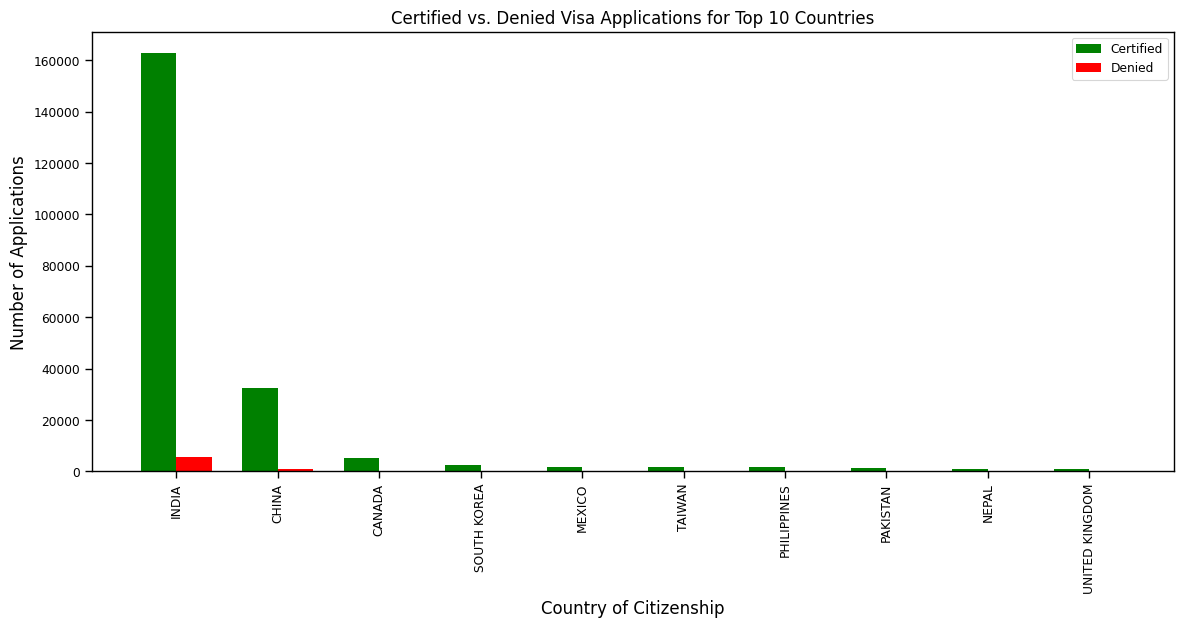

In [ ]:
# Group by country and case status, then count occurrences
country_status_counts = combined_df.groupby(['COUNTRY_OF_CITIZENSHIP', 'CASE_STATUS'])['EMPLOYER_CITY'].count().unstack()

# Get top 10 countries overall
top_10_countries = country_status_counts.sum(axis=1).nlargest(10).index

# Filter data for top 10 countries
country_status_counts = country_status_counts.loc[top_10_countries]

# Create bar graph with colors and centering
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35  # Width of the bars
x = np.arange(len(country_status_counts.index))  # the label locations

# Create bars for 'Certified' and 'Denied' side-by-side
certified_bars = ax.bar(x - width/2, country_status_counts['Certified'], width, label='Certified', color='green')
denied_bars = ax.bar(x + width/2, country_status_counts['Denied'], width, label='Denied', color='red')

# Set labels, title, and legend
ax.set_xlabel('Country of Citizenship')
ax.set_ylabel('Number of Applications')
ax.set_title('Certified vs. Denied Visa Applications for Top 10 Countries')
ax.set_xticks(x)
ax.set_xticklabels(country_status_counts.index)
ax.legend()

# Rotate and center x-axis labels
plt.xticks(rotation=90, ha='center')

# Adjust layout for better fit
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

In [ ]:
combined_df[['PW_WAGE', 'PW_UNIT_OF_PAY']].head(10)

,PW_WAGE,PW_UNIT_OF_PAY
367,"130,333.00",Year
629,"75,795.00",Year
630,"73,944.00",Year
647,"80,309.00",Year
669,"68,931.00",Year
676,"102,100.00",Year
679,"39,354.00",Year
681,"89,482.00",Year
686,"84,926.00",Year
690,"54,766.00",Year


In [ ]:
import numpy as np
import pandas as pd

# Sample data for demonstration (replace with your data)
# combined_df = pd.read_csv('your_data.csv')

# Step 1: Replace commas in PW_WAGE column
combined_df['PW_WAGE'] = combined_df['PW_WAGE'].str.replace(",", "")

# Step 2: Replace non-numeric placeholders with NaN
combined_df['PW_WAGE'] = combined_df['PW_WAGE'].replace('#############', np.nan)

# Step 3: Strip whitespace and ensure clean numeric conversion
combined_df['PW_WAGE'] = combined_df['PW_WAGE'].str.strip()

# Step 4: Convert PW_WAGE to numeric, setting any remaining issues to NaN
combined_df['PW_WAGE'] = pd.to_numeric(combined_df['PW_WAGE'], errors='coerce')

# Step 5: Convert PW_UNIT_OF_PAY rates to annual if not already, applying conversion logic
for unit in combined_df['PW_UNIT_OF_PAY'].unique():
    if unit in ["hr", "Hour"]:
        combined_df.loc[combined_df['PW_UNIT_OF_PAY'] == unit, 'PW_WAGE'] *= 8 * 250
        combined_df.loc[combined_df['PW_UNIT_OF_PAY'] == unit, 'PW_UNIT_OF_PAY'] = "Year"
    elif unit in ["wk", "Week"]:
        combined_df.loc[combined_df['PW_UNIT_OF_PAY'] == unit, 'PW_WAGE'] *= 50
        combined_df.loc[combined_df['PW_UNIT_OF_PAY'] == unit, 'PW_UNIT_OF_PAY'] = "Year"
    elif unit in ["mth", "Month"]:
        combined_df.loc[combined_df['PW_UNIT_OF_PAY'] == unit, 'PW_WAGE'] *= 12
        combined_df.loc[combined_df['PW_UNIT_OF_PAY'] == unit, 'PW_UNIT_OF_PAY'] = "Year"
    elif unit in ["bi", "Bi-Weekly"]:
        combined_df.loc[combined_df['PW_UNIT_OF_PAY'] == unit, 'PW_WAGE'] *= 25
        combined_df.loc[combined_df['PW_UNIT_OF_PAY'] == unit, 'PW_UNIT_OF_PAY'] = "Year"
    elif unit in ["yr", "Year"]:
        combined_df.loc[combined_df['PW_UNIT_OF_PAY'] == unit, 'PW_UNIT_OF_PAY'] = "Year"
    else:
        continue

# Step 6: Fill missing PW_WAGE values with the median
combined_df['PW_WAGE'] = combined_df['PW_WAGE'].fillna(combined_df['PW_WAGE'].median())

# Step 7: Ensure PW_WAGE is in float format
combined_df['PW_WAGE'] = combined_df['PW_WAGE'].astype(float)

# Display the first 10 rows to verify
print(combined_df[['PW_WAGE', 'PW_UNIT_OF_PAY']].head(10))


      PW_WAGE PW_UNIT_OF_PAY
367  130333.0           Year
629   75795.0           Year
630   73944.0           Year
647   80309.0           Year
669   68931.0           Year
676  102100.0           Year
679   39354.0           Year
681   89482.0           Year
686   84926.0           Year
690   54766.0           Year


In [ ]:
with pd.option_context('float_format', '{:.2f}'.format): print(combined_df.PW_WAGE.describe())

count      239392.00
mean        99514.30
std        272306.04
min         16820.00
25%         98488.00
50%         98488.00
75%         98488.00
max     120972000.00
Name: PW_WAGE, dtype: float64


In [ ]:
#Dividing our continuous income values into some categories to facilitate their visualization
combined_df['remuneration'] = pd.cut(combined_df['PW_WAGE'], [0, 30000, 60000,90000,120000,150000,180000,210000,240000,270000,495748000], right=False, labels=["0-30k", "30-60k","60-90k","90-120k","120-150k","150-180k","180-210k","210-240k","240-270k","270k+"])
salary = combined_df['remuneration'].value_counts()
salary.iloc[np.argsort(salary.index)]

,count
remuneration,
0-30k,188
30-60k,7554
60-90k,26587
90-120k,186460
120-150k,14280
150-180k,3049
180-210k,963
210-240k,221
240-270k,78


<ipython-input-22-73d7a57fd4dc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='remuneration', data=combined_df, kind="count",


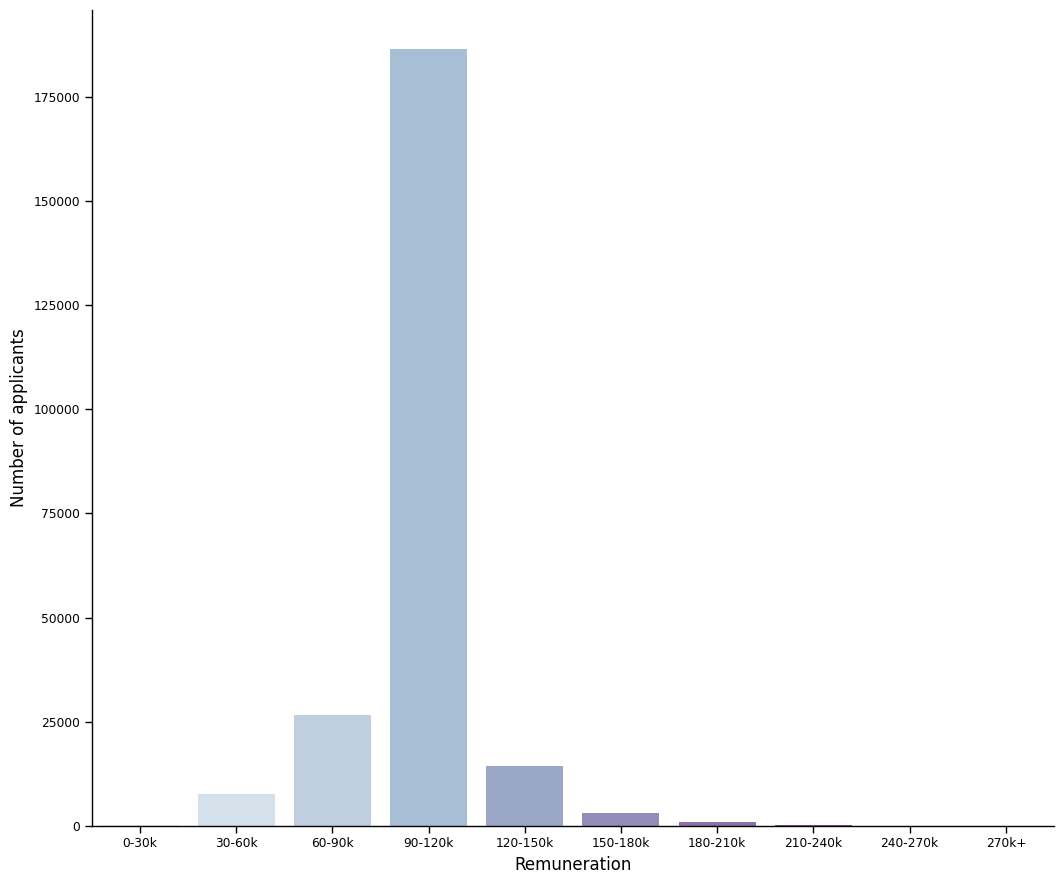

In [ ]:
g = sns.catplot(x='remuneration', data=combined_df, kind="count",
                   palette="BuPu", height=9, aspect=1.2) # height replaces size

g.set(xlabel='Remuneration', ylabel='Number of applicants')
plt.show() # Add plt.show() to display the plot

In [ ]:
combined_df.loc[combined_df.CASE_STATUS == 'Certified', 'CASE_STATUS'] = 1
combined_df.loc[combined_df.CASE_STATUS == 'Denied', 'CASE_STATUS'] = 0

#Filling missing values in "EMPLOYER_STATE" column with mode
combined_df['EMPLOYER_STATE'] = combined_df['EMPLOYER_STATE'].fillna(combined_df['EMPLOYER_STATE'].mode()[0]);

#Mapping from state name to abbreviation
state_abbrevs = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Northern Mariana Islands':'MP',
    'Palau': 'PW',
    'Puerto Rico': 'PR',
    'Virgin Islands': 'VI',
    'District of Columbia': 'DC'
}

#Capitalizing Keys
us_state_abbrev = {k.upper(): v for k, v in state_abbrevs.items()}
combined_df['EMPLOYER_STATE'].replace(us_state_abbrev, inplace=True)
combined_df.EMPLOYER_STATE = combined_df.EMPLOYER_STATE.astype(str)

<ipython-input-23-85a2526bec25>:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['EMPLOYER_STATE'].replace(us_state_abbrev, inplace=True)


In [ ]:
combined_df['PW_SOC_CODE'] = combined_df['PW_SOC_CODE'].str.replace('.','')
combined_df['PW_SOC_CODE'] = combined_df['PW_SOC_CODE'].str.replace('-','')
combined_df['PW_SOC_CODE'] = combined_df['PW_SOC_CODE'].astype(str).str[0:6]
combined_df['PW_SOC_CODE'].value_counts()

#Finding "nan" values in "PW_SOC_CODE" column and filling them with mode
combined_df.loc[combined_df['PW_SOC_CODE'] == "nan",'PW_SOC_CODE'] = combined_df['PW_SOC_CODE'].mode()[0]

#Finding "None" values in "PW_SOC_CODE" column and filling them with mode
combined_df.loc[combined_df['PW_SOC_CODE'] == "None",'PW_SOC_CODE'] = combined_df['PW_SOC_CODE'].mode()[0]

#Changing type from string to int
combined_df['PW_SOC_CODE'] = combined_df['PW_SOC_CODE'].astype(int)
combined_df['CASE_STATUS'] = combined_df['CASE_STATUS'].astype(int)

In [ ]:
#Replacing missing values with mode
combined_df['CLASS_OF_ADMISSION']=combined_df['CLASS_OF_ADMISSION'].fillna((combined_df['CLASS_OF_ADMISSION'].mode()[0]))
combined_df['COUNTRY_OF_CITIZENSHIP']=combined_df['COUNTRY_OF_CITIZENSHIP'].fillna((combined_df['COUNTRY_OF_CITIZENSHIP'].mode()[0]))
combined_df['EMPLOYER_CITY']=combined_df['EMPLOYER_CITY'].fillna((combined_df['EMPLOYER_CITY'].mode()[0]))
combined_df['EMPLOYER_NAME']=combined_df['EMPLOYER_NAME'].fillna((combined_df['EMPLOYER_NAME'].mode()[0]))
combined_df['EMPLOYER_NAME']=combined_df['EMPLOYER_NAME'].astype(str).str.upper()
combined_df['PW_WAGE_SOURCE']=combined_df['PW_WAGE_SOURCE'].fillna((combined_df['PW_WAGE_SOURCE'].mode()[0]))
combined_df['remuneration']=combined_df['remuneration'].fillna((combined_df['remuneration'].mode()[0]))

In [ ]:
combined_df.drop(['PW_UNIT_OF_PAY','PW_WAGE', 'JOB_TITLE'], axis=1, inplace=True)

In [ ]:
combined_df.drop(['CLASS_OF_ADMISSION'], axis=1, inplace=True)

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239392 entries, 367 to 645678
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   CASE_STATUS             239392 non-null  int64   
 1   COUNTRY_OF_CITIZENSHIP  239392 non-null  object  
 2   EMPLOYER_CITY           239392 non-null  object  
 3   EMPLOYER_NAME           239392 non-null  object  
 4   EMPLOYER_STATE          239392 non-null  object  
 5   PW_WAGE_SOURCE          239392 non-null  object  
 6   PW_SOC_CODE             239392 non-null  int64   
 7   year                    239392 non-null  int64   
 8   remuneration            239392 non-null  category
dtypes: category(1), int64(3), object(5)
memory usage: 16.7+ MB


In [ ]:
import pandas as pd

# Load your dataset (replace 'your_data.csv' with your file)
# combined_df = pd.read_csv('your_data.csv')

# Create a dictionary to store unique values for each column
unique_values = {col: combined_df[col].dropna().unique().tolist() for col in combined_df.columns}

# Convert the dictionary to a DataFrame (ensure each column is the same length by filling with None)
max_length = max(len(values) for values in unique_values.values())
unique_values_df = pd.DataFrame({k: pd.Series(v + [None] * (max_length - len(v))) for k, v in unique_values.items()})

# Save the DataFrame to a CSV file
unique_values_df.to_csv('unique_values.csv', index=False)

print("Unique values saved to 'unique_values.csv'.")


Unique values saved to 'unique_values.csv'.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import numpy as np

# Define features and target variable
X = combined_df[['COUNTRY_OF_CITIZENSHIP', 'EMPLOYER_CITY',
                 'EMPLOYER_NAME', 'EMPLOYER_STATE', 'PW_WAGE_SOURCE', 'PW_SOC_CODE',
                 'year', 'remuneration']]
y = combined_df['CASE_STATUS']

# Identify categorical columns to one-hot encode
categorical_cols = ['COUNTRY_OF_CITIZENSHIP', 'EMPLOYER_CITY',
                 'EMPLOYER_NAME', 'EMPLOYER_STATE', 'PW_WAGE_SOURCE', 'PW_SOC_CODE',
                 'year', 'remuneration']

# Use ColumnTransformer to apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Leave other columns (like 'year', 'remuneration') as is
)

# Build a pipeline to first transform the data and then apply Logistic Regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report and confusion matrix for more detailed evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# --- Prediction for 2024 ---

# Use 2024 data for prediction
data_2024 = X_test.copy()
data_2024['year'] = 2024  # Set 'year' to 2024

# Make predictions for 2024
predictions_2024 = pipeline.predict(data_2024)

# Save the pipeline (includes both the preprocessor and the model)
joblib.dump(pipeline, 'logistic_regression_model_with_encoder.pkl')



Accuracy: 0.9641596524572359
              precision    recall  f1-score   support

           0       0.71      0.06      0.11      1778
           1       0.96      1.00      0.98     46101

    accuracy                           0.96     47879
   macro avg       0.84      0.53      0.54     47879
weighted avg       0.96      0.96      0.95     47879

[[  104  1674]
 [   42 46059]]


['logistic_regression_model_with_encoder.pkl']

In [ ]:
# Get predicted probabilities for class 1 (CASE_STATUS = 1)
probabilities_2024 = pipeline.predict_proba(data_2024)[:, 1]

# Create a DataFrame with candidate index and their probabilities
ranked_candidates = pd.DataFrame({'Candidate_Index': data_2024.index, 'Probability_of_1': probabilities_2024})

# Sort the DataFrame by probability in descending order
ranked_candidates = ranked_candidates.sort_values(by=['Probability_of_1'], ascending=False)

# Print the ranked candidates
print("Ranked Candidates for 2024 (Higher probability indicates higher likelihood of CASE_STATUS = 1):")
print(ranked_candidates)

Ranked Candidates for 2024 (Higher probability indicates higher likelihood of CASE_STATUS = 1):
       Candidate_Index  Probability_of_1
46296           643190          0.999736
21457           644447          0.999676
28643           643524          0.999660
29099           643267          0.999660
16183           637353          0.999615
...                ...               ...
36294           217024          0.072146
19120           156288          0.072146
24624           217021          0.072146
18148           140192          0.065117
44156           323288          0.055776

[47879 rows x 2 columns]


In [ ]:
combined_df['PW_SOC_CODE'].unique()

array([151034, 151131, 151132, 112021, 131161, 172051, 193011, 172141,
       151141, 119199, 291065, 291122, 131111, 151121, 251011, 151031,
       271021, 291069, 419031, 119041, 151142, 111021, 113051, 172071,
       132051, 113021, 292012, 231011, 172199, 172072, 112022, 151133,
       132011, 119111, 252031, 172131, 113071, 273031, 291141, 191042,
       252021, 151051, 151032, 152041, 291021, 119051, 172041, 271025,
       292011, 291029, 252041, 172112, 172031, 173011, 536051, 172061,
       151071, 151199, 413031, 151134, 433031, 192041, 271024, 151179,
       271022, 291127, 111011, 259031, 113121, 132031, 132041, 113031,
       211012, 252053, 511011, 251042, 291051, 193021, 339021, 172075,
       131021, 253021, 131022, 131151, 272022, 119121, 516052, 439061,
       192032, 211029, 252022, 513022, 151021, 191021, 251021, 151022,
       131081, 151150, 192031, 131051, 251071, 251032, 171011, 119032,
       194092, 291011, 171021, 532012, 396012, 291123, 119033, 251199,
      

In [ ]:
combined_df.columns

Index(['CASE_STATUS', 'CLASS_OF_ADMISSION', 'COUNTRY_OF_CITIZENSHIP',
       'EMPLOYER_CITY', 'EMPLOYER_NAME', 'EMPLOYER_STATE', 'PW_WAGE_SOURCE',
       'PW_SOC_CODE', 'year', 'remuneration'],
      dtype='object')

# Connection to Front-End

In [ ]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

# Load the trained model (pipeline)
pipeline = joblib.load('logistic_regression_model_with_encoder.pkl')

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # Get the JSON data from the request
    data = request.json

    # Convert the input data into a DataFrame
    df = pd.DataFrame(data)

    # Make predictions using the loaded pipeline
    predictions = pipeline.predict(df)

    # Return predictions as a JSON response
    return jsonify(predictions.tolist())

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Prediction App</title>
</head>
<body>
    <h1>Predict CASE_STATUS</h1>
    <form id="predictionForm">
        <label for="country">Country of Citizenship:</label>
        <input type="text" id="country" placeholder="Country of Citizenship" required>
        <br>
        <label for="city">Employer City:</label>
        <input type="text" id="city" placeholder="Employer City" required>
        <br>
        <label for="employer">Employer Name:</label>
        <input type="text" id="employer" placeholder="Employer Name" required>
        <br>
        <label for="state">Employer State:</label>
        <input type="text" id="state" placeholder="Employer State" required>
        <br>
        <label for="wageSource">Wage Source:</label>
        <input type="text" id="wageSource" placeholder="Wage Source" required>
        <br>
        <label for="socCode">SOC Code:</label>
        <input type="text" id="socCode" placeholder="SOC Code" required>
        <br>
        <label for="year">Year:</label>
        <input type="number" id="year" value="2024" required>
        <br>
        <label for="remuneration">Remuneration:</label>
        <input type="number" id="remuneration" placeholder="Remuneration" required>
        <br>
        <button type="submit">Predict</button>
    </form>

    <div id="result"></div>

    <script>
        document.getElementById('predictionForm').addEventListener('submit', async function(event) {
            event.preventDefault(); // Prevent form submission

            // Gather input data into an object
            const data = {
                COUNTRY_OF_CITIZENSHIP: document.getElementById('country').value,
                EMPLOYER_CITY: document.getElementById('city').value,
                EMPLOYER_NAME: document.getElementById('employer').value,
                EMPLOYER_STATE: document.getElementById('state').value,
                PW_WAGE_SOURCE: document.getElementById('wageSource').value,
                PW_SOC_CODE: document.getElementById('socCode').value,
                year: parseInt(document.getElementById('year').value),
                remuneration: parseInt(document.getElementById('remuneration').value)
            };

            // Send a POST request to the prediction API
            const response = await fetch('http://127.0.0.1:5000/predict', {
                method: 'POST',
                headers: {
                    'Content-Type': 'application/json',
                },
                body: JSON.stringify([data]) // Wrap in an array for batch predictions
            });

            // Handle the response
            const result = await response.json();
            document.getElementById('result').innerText = `Predicted CASE_STATUS: ${result}`;
        });
    </script>
</body>
</html>
